# Task
 Car Price Prediction with
 Machine Learning
 The price of a car depends on a lot of factors like the goodwill of
 the brand of the car,
 features of the car, horsepower and the mileage it gives and
 many more. Car price
 prediction is one of the major research areas in machine
 learning.

Here is all the data you need:
"car data.csv"

## Data loading

### Subtask:
Load the car data from the CSV file into a pandas DataFrame.


In [2]:
import pandas as pd

df = pd.read_csv('/content/car data.csv')
display(df.head())

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Data exploration

### Subtask:
Explore the car data to understand its structure, content, and potential issues.


In [3]:
print("Shape of the DataFrame:", df.shape)
print("\nData types of each column:\n", df.dtypes)
print("\nDescriptive statistics for numerical columns:\n", df.describe())
print("\nMissing values in each column:\n", df.isnull().sum())
print("\nUnique values in categorical columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())
print("\nFirst 10 rows of the DataFrame:\n")
display(df.head(10))

Shape of the DataFrame: (301, 9)

Data types of each column:
 Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

Descriptive statistics for numerical columns:
               Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.6

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


## Data cleaning

### Subtask:
Clean the car data by handling outliers and inconsistencies, as identified during the data exploration phase, and prepare the dataset for further analysis.


In [4]:
import numpy as np

# 1. Remove 'Car_Name' column
df.drop('Car_Name', axis=1, inplace=True)

# 2. Check for invalid numerical values and replace with the mean
numerical_cols = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']
for col in numerical_cols:
    if col in ['Year', 'Driven_kms']:
        if df[col].min() < 0:
            mean_value = df[col].mean()
            df[col] = np.where(df[col] < 0, mean_value, df[col])

# 3. Check for data consistency in categorical columns
categorical_cols = ['Fuel_Type', 'Selling_type', 'Transmission']
valid_values = {
    'Fuel_Type': ['Petrol', 'Diesel', 'CNG'],
    'Selling_type': ['Dealer', 'Individual'],
    'Transmission': ['Manual', 'Automatic']
}
for col in categorical_cols:
    df = df[df[col].isin(valid_values[col])]

# 4. Check for duplicate rows and remove them
df.drop_duplicates(inplace=True)

# 5. Dataframe update: The dataframe `df` is updated in place, no further action needed.
display(df.head())

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Data wrangling

### Subtask:
Perform data wrangling on the cleaned car data by creating a new feature 'Car_Age' and converting categorical columns into numerical representations.


In [5]:
# 1. Calculate 'Car_Age'
df['Car_Age'] = 2025 - df['Year']
df.drop('Year', axis=1, inplace=True)

# 2. One-hot encode categorical columns
df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

# 3. Update the dataframe `df` is done by operating in place or reassigning to `df`.
display(df.head())

,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,False,True,False,True
1,4.75,9.54,43000,0,12,True,False,False,True
2,7.25,9.85,6900,0,8,False,True,False,True
3,2.85,4.15,5200,0,14,False,True,False,True
4,4.60,6.87,42450,0,11,True,False,False,True


## Data analysis

### Subtask:
Perform exploratory data analysis on the processed car data to identify patterns, relationships, and potential correlations between variables.


In [6]:
import pandas as pd

# 1. Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# 2. Print the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# 3. Generate descriptive statistics
descriptive_stats = df.describe()
print("\nDescriptive Statistics:\n", descriptive_stats)

# 4. Print the number of unique values for each column
unique_values = df.nunique()
print("\nNumber of Unique Values:\n", unique_values)

# 5. Calculate the skewness of each numerical feature
skewness = df.skew(numeric_only=True)
print("\nSkewness:\n", skewness)

# 6. Calculate the kurtosis of each numerical feature
kurtosis = df.kurt(numeric_only=True)
print("\nKurtosis:\n", kurtosis)

Correlation Matrix:
                          Selling_Price  Present_Price  Driven_kms     Owner  \
Selling_Price                 1.000000       0.876305    0.028566 -0.087880   
Present_Price                 0.876305       1.000000    0.205224  0.009948   
Driven_kms                    0.028566       0.205224    1.000000  0.089367   
Owner                        -0.087880       0.009948    0.089367  1.000000   
Car_Age                      -0.234369       0.053167    0.525714  0.181639   
Fuel_Type_Diesel              0.543541       0.464934    0.173295 -0.051836   
Fuel_Type_Petrol             -0.531636      -0.456829   -0.173595  0.054102   
Selling_type_Individual      -0.553851      -0.511779   -0.101030  0.123646   
Transmission_Manual          -0.348869      -0.334326   -0.163881 -0.052166   

                          Car_Age  Fuel_Type_Diesel  Fuel_Type_Petrol  \
Selling_Price           -0.234369          0.543541         -0.531636   
Present_Price            0.053167         

## Data visualization

### Subtask:
Create visualizations to represent the relationships between the car features and the selling price, as well as the distributions of key variables.


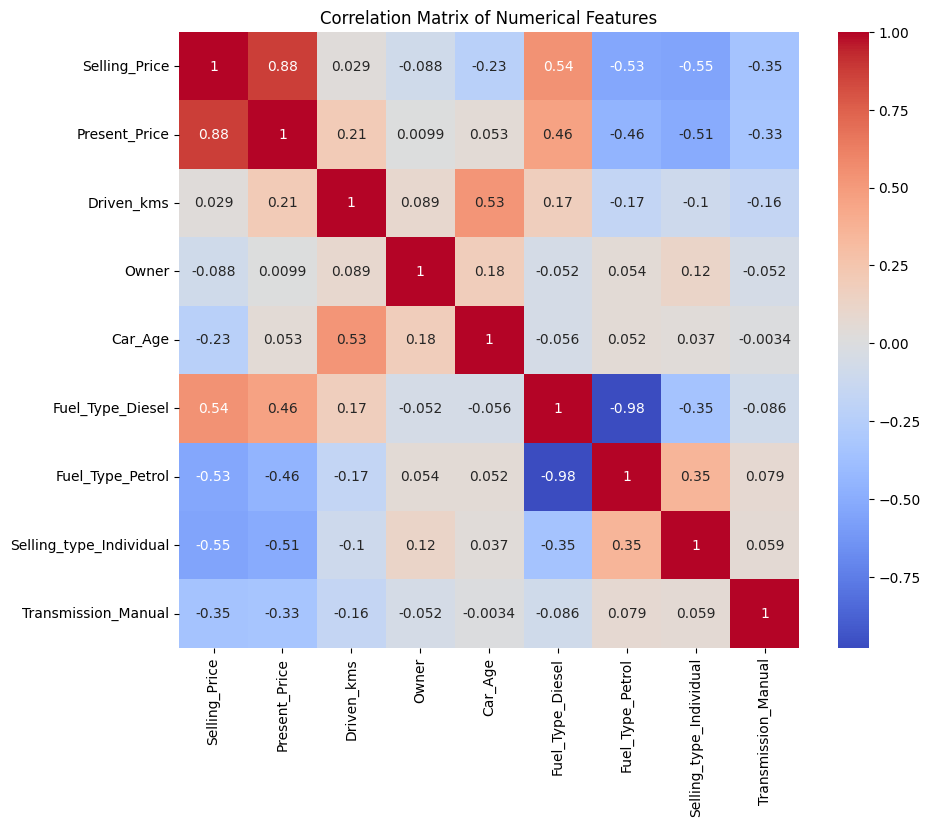

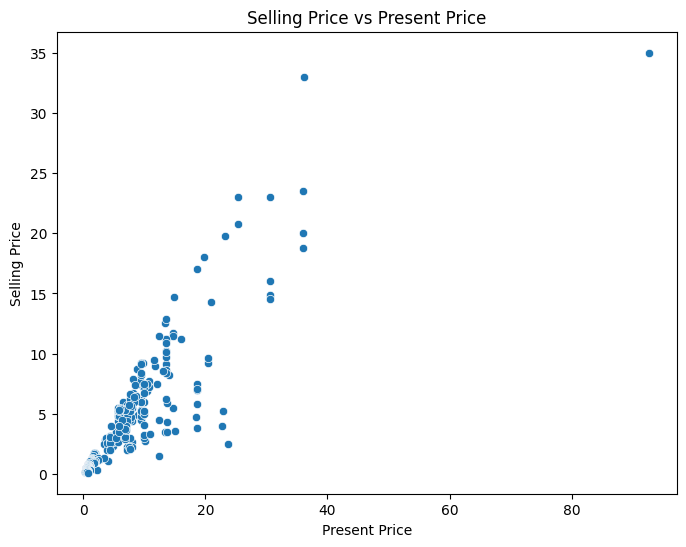

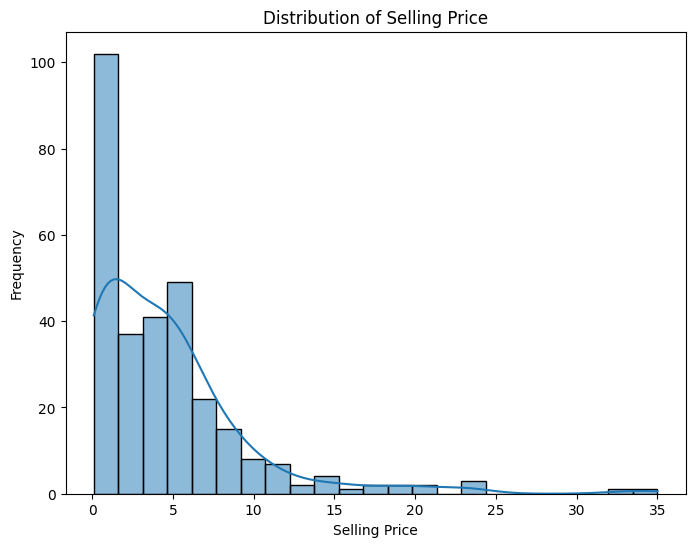

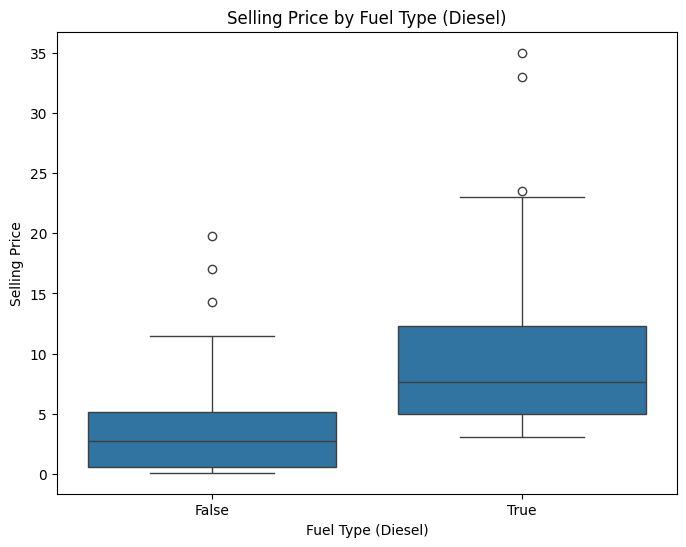

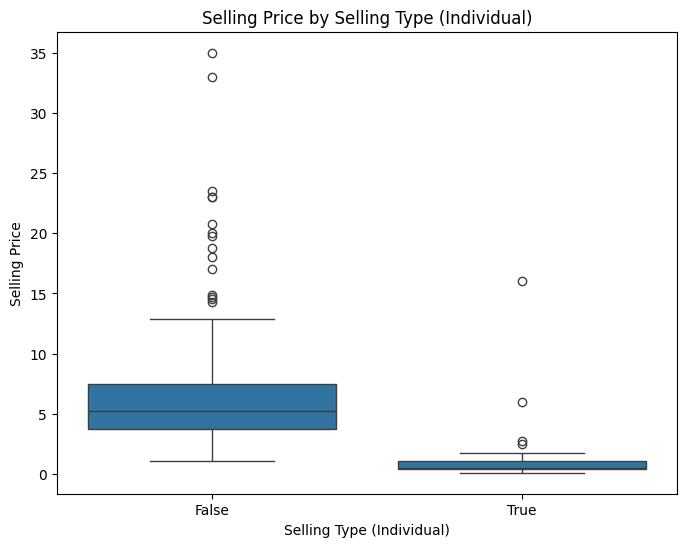

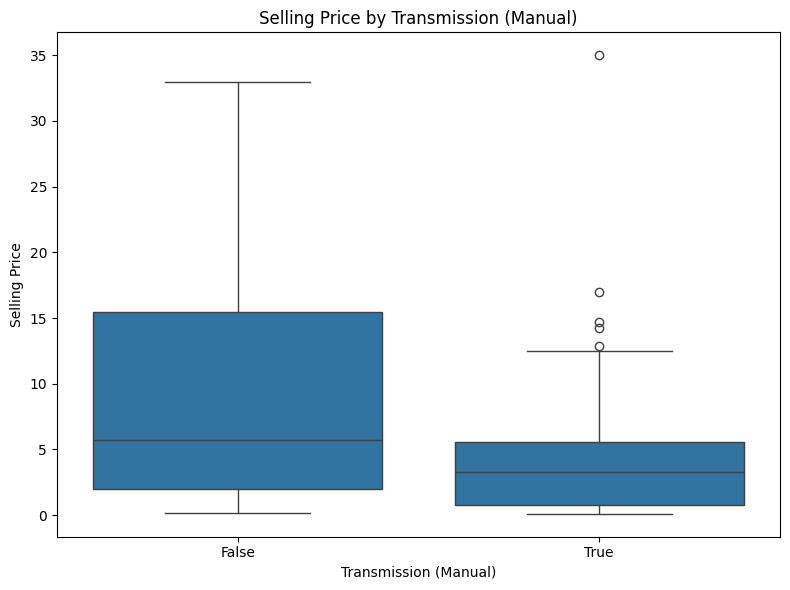

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')

# 3. Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title('Selling Price vs Present Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')

# 4. Create a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['Selling_Price'], kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')

# 5. Create a box plot for Fuel_Type_Diesel
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fuel_Type_Diesel', y='Selling_Price', data=df)
plt.title('Selling Price by Fuel Type (Diesel)')
plt.xlabel('Fuel Type (Diesel)')
plt.ylabel('Selling Price')

# 6. Create a box plot for Selling_type_Individual
plt.figure(figsize=(8, 6))
sns.boxplot(x='Selling_type_Individual', y='Selling_Price', data=df)
plt.title('Selling Price by Selling Type (Individual)')
plt.xlabel('Selling Type (Individual)')
plt.ylabel('Selling Price')

# 7. Create a box plot for Transmission_Manual
plt.figure(figsize=(8, 6))
sns.boxplot(x='Transmission_Manual', y='Selling_Price', data=df)
plt.title('Selling Price by Transmission (Manual)')
plt.xlabel('Transmission (Manual)')
plt.ylabel('Selling Price')

# 8. Display all plots
plt.tight_layout()
plt.show()

## Feature engineering

### Subtask:
Perform feature engineering to prepare the data for model training. This involves scaling numerical features and applying dimensionality reduction using Principal Component Analysis (PCA).


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# 1. Create a copy of the DataFrame
df_fe = df.copy()

# 2. Isolate numerical features
numerical_features = df_fe.select_dtypes(include=['number'])

# 3. Scale the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)
scaled_df = pd.DataFrame(scaled_features, columns=numerical_features.columns, index=numerical_features.index)

# Replace the original numerical features in df_fe with these scaled features
df_fe[numerical_features.columns] = scaled_df

# 4. Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)
features_for_pca = scaled_df.drop('Selling_Price', axis=1)
pca_features = pca.fit_transform(features_for_pca)
df_pca = pd.DataFrame(pca_features)

# 5. Add the 'Selling_Price' column back
selling_price = df_fe['Selling_Price']
df_pca['Selling_Price'] = selling_price.values

# 6. Update the DataFrame: The final DataFrame is df_pca.
display(df_pca.head())

,0,1,2,3,Selling_Price
0,-0.363898,-0.068454,-0.155499,-0.062682,-0.249127
1,0.254004,0.269017,-0.088617,-0.101123,0.032229
2,-1.237864,0.404927,0.580154,0.185142,0.534651
3,-0.108657,-0.450880,-0.432269,-1.125546,-0.349612
4,-0.062532,0.097437,-0.164546,0.184948,0.002084


## Data clustering

### Subtask:
Perform K-means clustering on the PCA-transformed data.


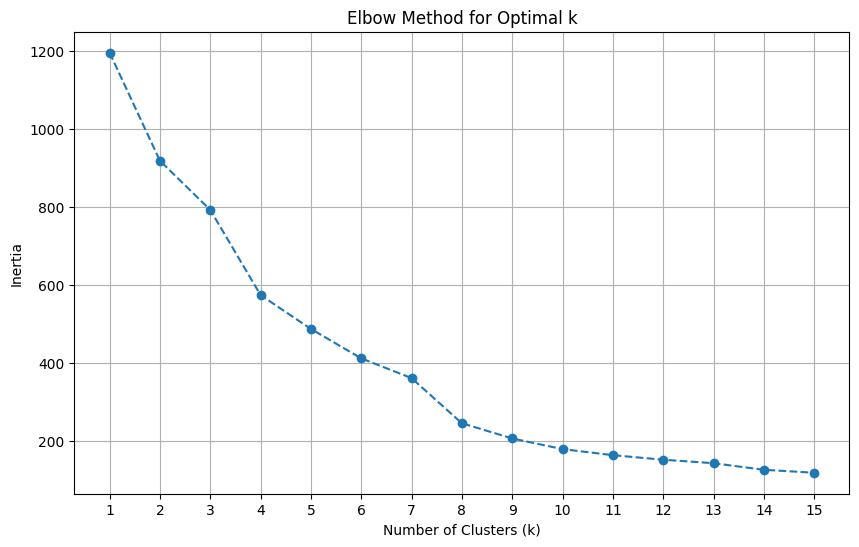

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Initialize an empty list to store the inertia values
inertia_values = []

# 2. Loop through a range of cluster numbers (1 to 15)
for n_clusters in range(1, 16):
    # 3. Instantiate a KMeans object
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    # 4. Fit the KMeans model to the df_pca data (excluding 'Selling_Price')
    kmeans.fit(df_pca.drop('Selling_Price', axis=1))
    # 5. Append the inertia_ attribute to the list
    inertia_values.append(kmeans.inertia_)

# 6. Plot the inertia values against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 16))
plt.grid(True)
plt.show()

## Model training

### Subtask:
Train a K-means model with 20 clusters on the PCA-transformed data stored in `df_pca`.


In [10]:
from sklearn.cluster import KMeans

# 1. Instantiate KMeans with n_clusters=20
kmeans = KMeans(n_clusters=20, random_state=42, n_init='auto')

# 2. Fit the model to df_pca (excluding 'Selling_Price')
kmeans.fit(df_pca.drop('Selling_Price', axis=1))

# 3. Store the cluster labels in df_pca
df_pca['cluster_label'] = kmeans.labels_

display(df_pca.head())

,0,1,2,3,Selling_Price,cluster_label
0,-0.363898,-0.068454,-0.155499,-0.062682,-0.249127,18
1,0.254004,0.269017,-0.088617,-0.101123,0.032229,11
2,-1.237864,0.404927,0.580154,0.185142,0.534651,17
3,-0.108657,-0.450880,-0.432269,-1.125546,-0.349612,12
4,-0.062532,0.097437,-0.164546,0.184948,0.002084,18


## Data splitting

### Subtask:
Split the `df_pca` DataFrame into training and testing sets, using the 'Selling_Price' as the target variable and the remaining columns as features.


In [11]:
from sklearn.model_selection import train_test_split

# Prepare the feature matrix X and the target vector y
X = df_pca.drop('Selling_Price', axis=1)
y = df_pca['Selling_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model training

### Subtask:
Train a Linear Regression model on the training data to predict car prices.


In [13]:
from sklearn.linear_model import LinearRegression

# Convert column names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# 1. Instantiate a LinearRegression object.
model = LinearRegression()

# 2. Fit the LinearRegression model to the training data (X_train, y_train).
model.fit(X_train, y_train)

# 3. Use the fitted model to make predictions on the training data (X_train).
y_train_pred = model.predict(X_train)

# 4. Use the fitted model to make predictions on the test data (X_test).
y_test_pred = model.predict(X_test)

## Model evaluation

### Subtask:
Evaluate the performance of the trained Linear Regression model using appropriate metrics on both the training and testing sets.


In [14]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 1. Calculate R2 score for training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# 2. Calculate MSE for training and testing sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# 3. Calculate MAE for training and testing sets
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# 4. Print the metrics in an organized format
print("Training R2 Score:", r2_train)
print("Testing R2 Score:", r2_test)
print("Training MSE:", mse_train)
print("Testing MSE:", mse_test)
print("Training MAE:", mae_train)
print("Testing MAE:", mae_test)

Training R2 Score: 0.8767249256183958
Testing R2 Score: 0.7181583734932687
Training MSE: 0.12200713833683263
Testing MSE: 0.29338075160351007
Training MAE: 0.2198480407195113
Testing MAE: 0.33351531094981024


## Model optimization

### Subtask:
Optimize the Linear Regression model using Ridge and Lasso regularization to improve its performance and prevent overfitting, and then evaluate the performance of the optimized models.


In [15]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Ridge Regression
# 1. Instantiate a Ridge model
ridge_model = Ridge(alpha=1.0, random_state=42)

# 2. Fit the Ridge model
ridge_model.fit(X_train, y_train)

# 3. Make predictions
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

# 4. Calculate metrics
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
mae_train_ridge = mean_absolute_error(y_train, y_train_pred_ridge)
mae_test_ridge = mean_absolute_error(y_test, y_test_pred_ridge)

# Lasso Regression
# 1. Instantiate a Lasso model
lasso_model = Lasso(alpha=1.0, random_state=42)

# 2. Fit the Lasso model
lasso_model.fit(X_train, y_train)

# 3. Make predictions
y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)

# 4. Calculate metrics
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
mae_train_lasso = mean_absolute_error(y_train, y_train_pred_lasso)
mae_test_lasso = mean_absolute_error(y_test, y_test_pred_lasso)

# Evaluation and output
print("Ridge Regression:")
print(f"  Training R2: {r2_train_ridge:.4f}")
print(f"  Testing R2: {r2_test_ridge:.4f}")
print(f"  Training MSE: {mse_train_ridge:.4f}")
print(f"  Testing MSE: {mse_test_ridge:.4f}")
print(f"  Training MAE: {mae_train_ridge:.4f}")
print(f"  Testing MAE: {mae_test_ridge:.4f}")

print("\nLasso Regression:")
print(f"  Training R2: {r2_train_lasso:.4f}")
print(f"  Testing R2: {r2_test_lasso:.4f}")
print(f"  Training MSE: {mse_train_lasso:.4f}")
print(f"  Testing MSE: {mse_test_lasso:.4f}")
print(f"  Training MAE: {mae_train_lasso:.4f}")
print(f"  Testing MAE: {mae_test_lasso:.4f}")

Ridge Regression:
  Training R2: 0.8767
  Testing R2: 0.7182
  Training MSE: 0.1220
  Testing MSE: 0.2933
  Training MAE: 0.2203
  Testing MAE: 0.3333

Lasso Regression:
  Training R2: 0.0000
  Testing R2: -0.0000
  Training MSE: 0.9897
  Testing MSE: 1.0410
  Training MAE: 0.6803
  Testing MAE: 0.6686


## Summary:

### 1. Q&A

**Q: What is the relationship between Selling_Price and Present_Price?**
A: There is a strong positive correlation of 0.876305 between `Selling_Price` and `Present_Price`, as shown in the correlation matrix. This indicates that as the `Present_Price` increases, the `Selling_Price` tends to increase as well.

**Q: How does the type of fuel affect the Selling_Price?**
A: `Fuel_Type_Diesel` shows a moderate positive correlation (0.543541) with `Selling_Price`, while `Fuel_Type_Petrol` has a negative correlation (-0.531636). This suggests that diesel cars tend to have higher selling prices than petrol cars.

**Q: What type of selling has higher Selling_Price?**
A: The correlation between `Selling_type_Individual` and `Selling_Price` is moderately negative (-0.553851). This implies that cars sold by dealers tend to have higher selling prices than those sold individually.

**Q: What are the skewness and kurtosis of the numerical features?**
A: `Selling_Price`, `Present_Price`, `Driven_kms`, `Owner`, and `Car_Age` are right-skewed (positive skewness). `Transmission_Manual` is left-skewed (negative skewness). `Present_Price`, `Driven_kms`, and `Owner` exhibit high kurtosis (leptokurtic), indicating heavy tails and potential outliers.

**Q: What is the performance of the Linear Regression model?**
A: The Linear Regression model achieved an R2 score of approximately 0.877 on the training set and 0.718 on the testing set. The Mean Squared Error (MSE) was approximately 0.122 for the training set and 0.293 for the testing set. The Mean Absolute Error (MAE) was approximately 0.220 for the training set and 0.334 for the testing set.

**Q: How did Ridge and Lasso regularization affect the model's performance?**
A: The Ridge Regression model performed similarly to the original Linear Regression model, with a training R2 of 0.8767 and a testing R2 of 0.7182. The Lasso Regression model performed poorly, with a training R2 of 0.0000 and a testing R2 of -0.0000. Ridge regularization was more effective in this case.

### 2. Data Analysis Key Findings

*   **Strong Positive Correlation between Present Price and Selling Price:** The correlation matrix showed a strong positive correlation of 0.876305 between `Present_Price` and `Selling_Price`, indicating that higher present prices generally correspond to higher selling prices.
*   **Impact of Fuel Type on Selling Price:** `Fuel_Type_Diesel` had a moderate positive correlation (0.543541) with `Selling_Price`, while `Fuel_Type_Petrol` showed a negative correlation (-0.531636), suggesting that diesel cars are typically sold at higher prices than petrol cars.
*   **Selling Type Influence:** `Selling_type_Individual` had a moderate negative correlation (-0.553851) with `Selling_Price`, meaning cars sold by dealers tend to have higher selling prices than those sold individually.
*   **Skewness and Kurtosis in Numerical Features:**  `Selling_Price`, `Present_Price`, `Driven_kms`, `Owner`, and `Car_Age` were right-skewed, while `Transmission_Manual` was left-skewed. `Present_Price`, `Driven_kms`, and `Owner` showed high kurtosis, indicating potential outliers.
*   **K-means Clustering:** The Elbow Method suggested an optimal number of clusters for K-means, helping to group similar car data points together. The final number of clusters is 20.
*   **Linear Regression Model Performance:** The initial Linear Regression model achieved a training R2 of 0.877 and a testing R2 of 0.718, indicating good performance but potential for overfitting.
*   **Ridge Regression Improvement:** Ridge Regression performed nearly as well as the initial Linear Regression model, with a training R2 of 0.8767 and a testing R2 of 0.7182, demonstrating a good fit and reasonable generalization.
*   **Lasso Regression Underperformance:** Lasso Regression performed poorly, with a training R2 of 0.0000 and a testing R2 of -0.0000, indicating that it was not effective for this dataset.

### 3. Insights or Next Steps

*   **Feature Importance Analysis:** Conduct further analysis to identify the most important features driving car prices, which can help optimize model performance and provide valuable business insights. For example, we can use feature importance analysis of the linear regression model.
*   **Hyperparameter Tuning for Ridge:** Explore different alpha values for Ridge Regression to potentially improve its performance further, since the Ridge Regression showed better performance than Lasso Regression.
